<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Analogía de la mecánica respiratoria</font></b></h1>
        <h2><font color='0B5345'>Trabajo 1 2025-02</font></h2>
        <h3><font color='0B5345'>Allison J. Rojas, Jader S. Chingal, Johan S Rendon </font></h3>
    </div>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# Parámetros de simulación

tm = 0.001   # intervalo de tiempo (s)
t_max = 20   # tiempo total de simulación (s)
time = np.arange(0, t_max + tm, tm)

# Conjuntos de parámetros bibliograficos reportados 
conjuntos = {
    'Sano': {'Rc': 1.0, 'Rp': 0.5, 'CL': 0.2, 'Cs': 0.005, 'Cw': 0.2, 'f': 0.2},
    'condición 1':    {'Rc': 1.3, 'Rp': 0.1,  'CL': 0.11,'Cs': 0.0029, 'Cw': 0.12, 'f': 0.25},
    'condición 2':    {'Rc': 1.9, 'Rp': 0.3, 'CL': 0.15, 'Cs': 0.0037,  'Cw': 0.14, 'f': 0.33},
}

# Paleta de colores (edítalos si quieres)
colores = {
    'Sano':        '#1f77b4',  # azul
    'condición 1': '#d62728',  # rojo
    'condición 2': "#0a0a0a",  # verde
}


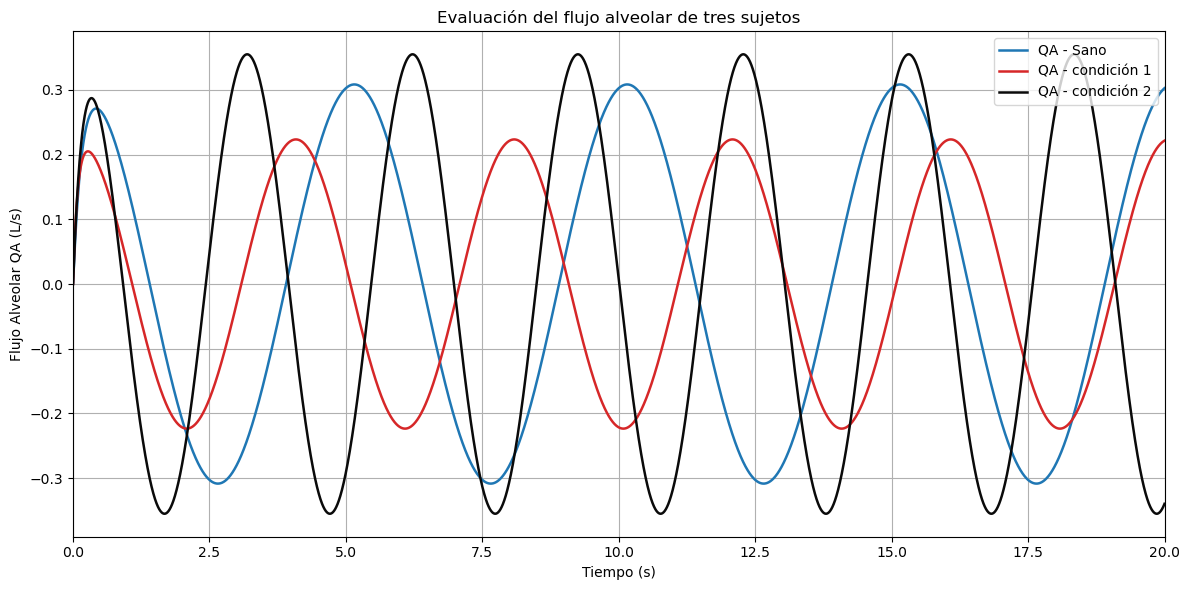

Imagen guardada como: flujo_alveolar_0_20s.png


In [3]:
# Función de entrada: presión senoidal
def generar_Pao(f, t):
  #2.5 por configuracion de Pao (5 cmH2O pico a pico)
    return 2.5 * np.sin(2 * np.pi * f * t)

fig, ax = plt.subplots(figsize=(12, 6))

# Creación de la funcion donde estara la funcion de transferencia
for nombre, datos in conjuntos.items():
  
  #Extraer la información del diccionario
    Rc, Rp = datos['Rc'], datos['Rp']
    CL, Cs, Cw = datos['CL'], datos['Cs'], datos['Cw']

    #Simplificación de la ecuacion agrupando en variables
    a2 = Rp * Rc * Cs * CL * Cw
    a1 = (Rc * Cs * Cw + Rc * Cs * CL + Rp * Cs * Cw +
          Rc * CL * Cw + Rp * CL * Cw)
    a0 = CL + Cw

    #Numerador y denominador de la funcion de transferencia
    num = [CL * Cw, 0]
    den = [a2, a1, a0]

    #Crear sistema
    system = signal.TransferFunction(num, den)

    #Señal de entrada
    Pao = generar_Pao(datos['f'], time)

    # Simular respuesta del sistema
    t_out, QA_tf, _ = signal.lsim(system, Pao, T=time)

    # Graficar con color y estilo
    ax.plot(t_out, QA_tf,
            label=f"QA - {nombre}",
            color=colores.get(nombre, None),
            linewidth=1.8)

# Etiquetas y estilo
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Flujo Alveolar QA (L/s)")
ax.set_title("Evaluación del flujo alveolar de tres sujetos")

# --- Ajustes para quitar el “espacio” y fijar 0–20 s ---
ax.set_xlim(0, t_max)   # límite exacto del eje X
ax.margins(x=0)         # sin margen horizontal (evita espacio al inicio/fin)
# (opcional) ax.autoscale(enable=True, tight=True)  # puede usarse en lugar de margins

# Leyenda
ax.legend(loc='upper right', frameon=True)

# Cuadrícula y layout
ax.grid(True)
fig.tight_layout()

# Guardar imagen
nombre_png = "flujo_alveolar_0_20s.png"
fig.savefig(nombre_png, dpi=200, bbox_inches='tight')

plt.show()

print(f"Imagen guardada como: {nombre_png}")